#  Haberman’s Survival Data:
***
* This dataset contains three independant variables or featues namely age,year,nodes
> &emsp;    **age** - represents age of the patient
<br>  &emsp;  **year** - year in which operation happend
<br>   &emsp; **nodes** - number of nodes 

* A dependant variable or class label, status
>  &emsp;  **status** - patient survied more than 5 years or not 

## objective:
>Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification
<br>Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication
<br>To obtain confidence and clarity on data

#### importing required libraries and loading data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
haberman = pd.read_csv('haberman.csv')  #loading data using pandas and we use haberman as identifier



In [2]:
haberman.head() #to see first 5 rows of dataset and to confirm it loaded 

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
type(haberman) #data type

pandas.core.frame.DataFrame

In [4]:
haberman.shape  #shape of the dataset

(306, 4)

#### Observation:
>haberman.shape ,lets us know that the dataset contains 306 rows and 4 columns

In [5]:
haberman.columns #columns in the dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


#### Observations:
>There are no missing values in this data set
<br>All the columns are of the integer data type

In [7]:
haberman.status.value_counts()

1    225
2     81
Name: status, dtype: int64

#### Observations:
>Out of 306 patients, 225 patients survived and 81 did not.
<br>The dataset is imbalanced.

In [8]:
haberman.status.unique()

array([1, 2])

class label status has two integer values 1 and 2 ,which may create problems

In [9]:
haberman.status=haberman.status.map({1:"yes",2:"no"}) #replace 1 with yes and 2 with no
haberman.status = haberman['status'].astype('category') #change type of status column from integer to category

In [10]:
haberman.tail()


,age,year,nodes,status
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no
305,83,58,2,no


## Bi-variate analysis
***

### pair plots

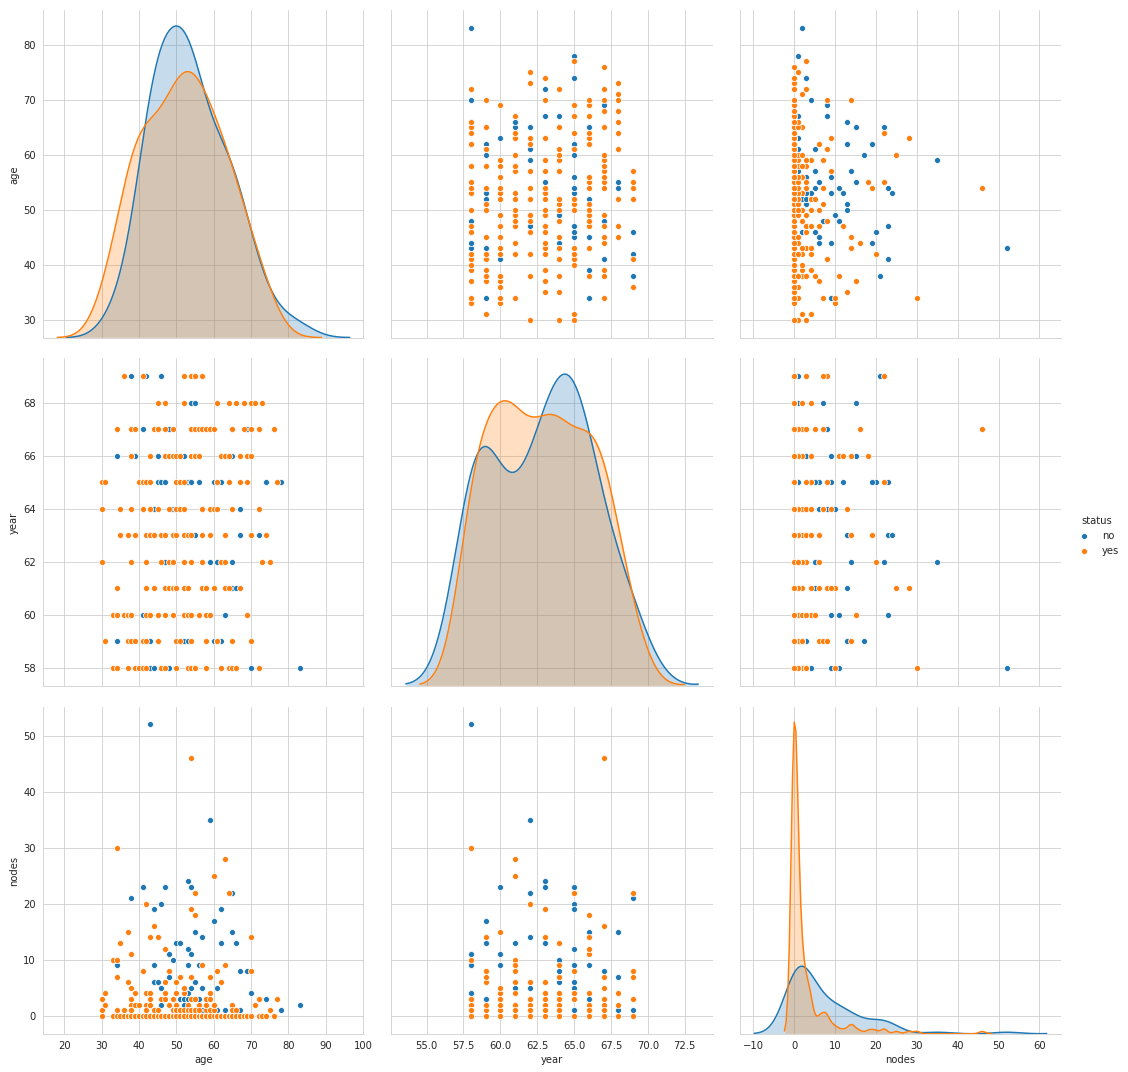

In [21]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue = 'status',height = 5)
plt.show()

#### Observations: 

>There were 3 features,therefore we get 3 unique pair plots
<br>The plot between age and year is overlapped 
<br>The plot between age and nodes is more better than the age and year plot
<br>The plot between year and nodes is comparatively more better than other plots

### scatter plot

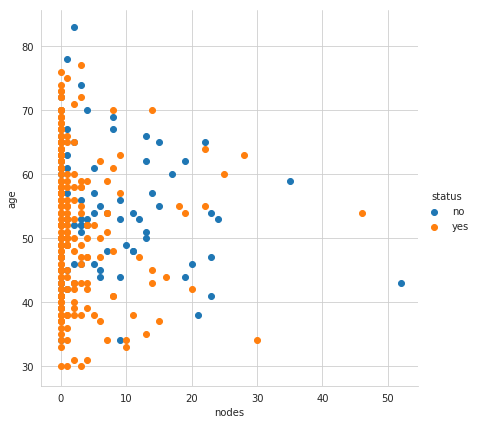

In [12]:

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue = 'status' , height = 6)\
 .map(plt.scatter,"nodes",'age')\
 .add_legend();
plt.show()

 ## Univaraite analysis
 ***

 ### Probability Density Function(PDF)

/home/brucewayne5c/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


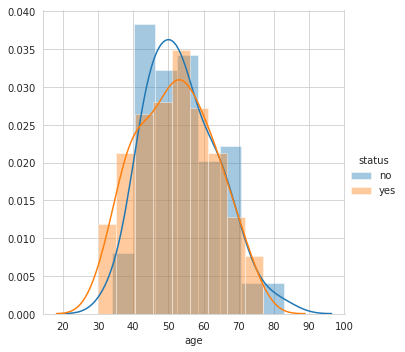

In [13]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


#### Observation:
>At the age range from 55 to 75 , the status of survival and death is more similar
<br>From 43 to 53, there is low survival rate
<br>From 30 to 40, there is more survival rate

/home/brucewayne5c/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


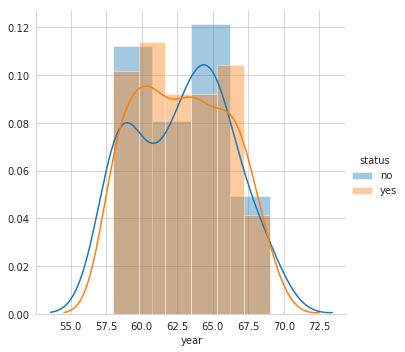

In [14]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();


#### Observation:
> The years 1960 and 1965 there were more unsuccessful operations
<br>The survivial rate is cant be unpredictable because the graphs are overlapped mostly

/home/brucewayne5c/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


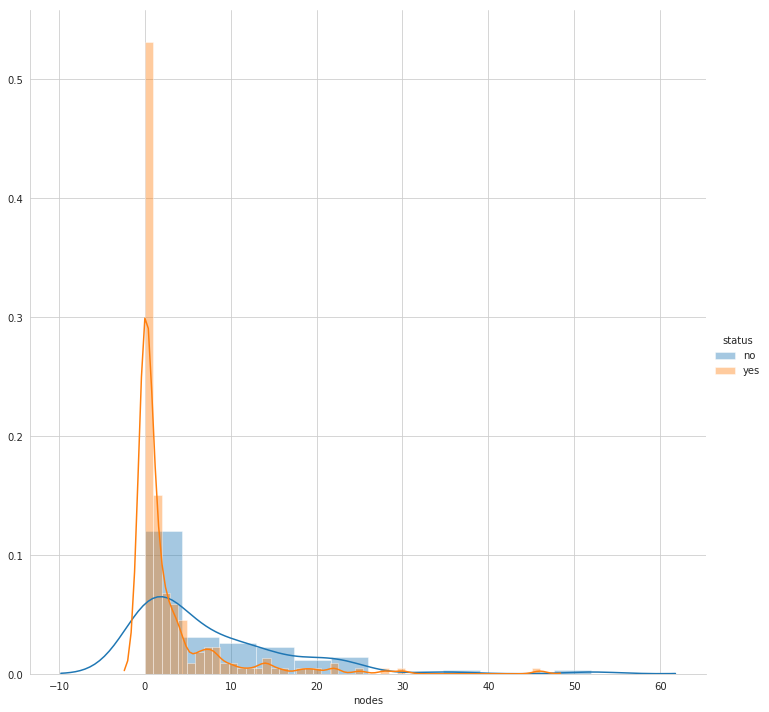

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", size=10) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();


#### Obsevation:
>patients with no nodes or 1 node are more likely to survive
,also surivial rate quite predictable and is high upto 3 nodes 

### Cumulative Distribution Function(CDF)

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


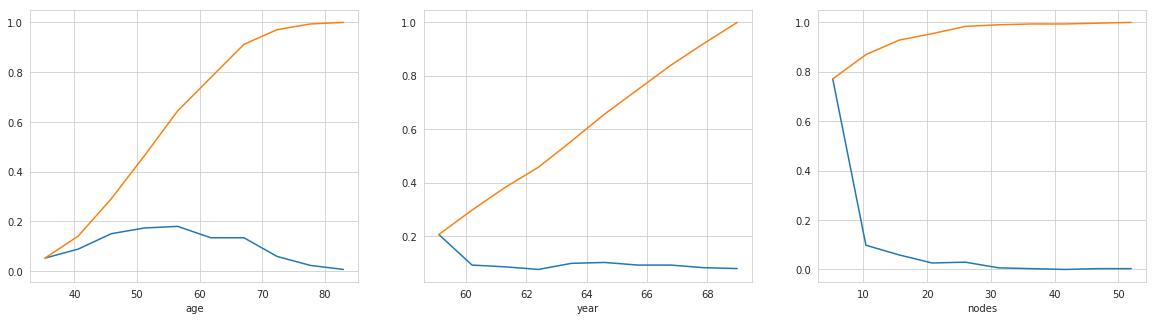

In [24]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    
    counts, bin_edges = np.histogram(haberman[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    
    plt.xlabel(feature)
    

#### Observation:
>we can see that almost 80% of the patients have positive lymph nodes less than 10

### Box Plots and Violin Plots

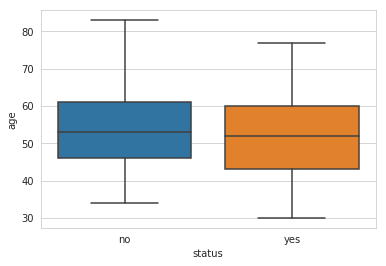

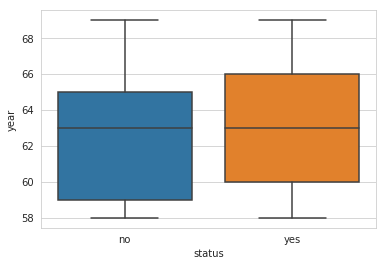

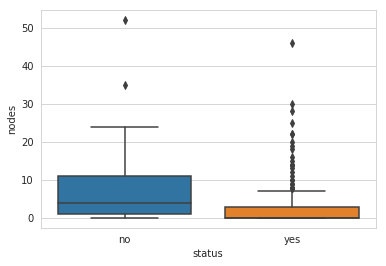

In [17]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()
sns.boxplot(x='status',y='year', data=haberman)
plt.show()
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

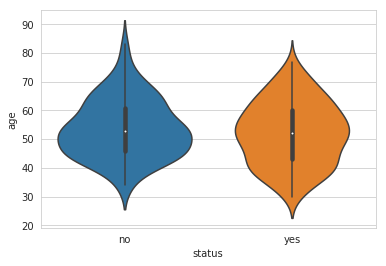

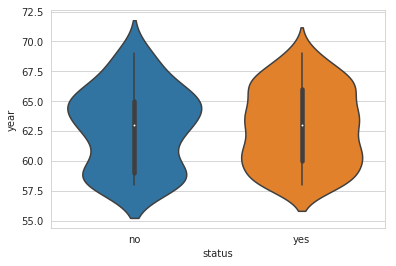

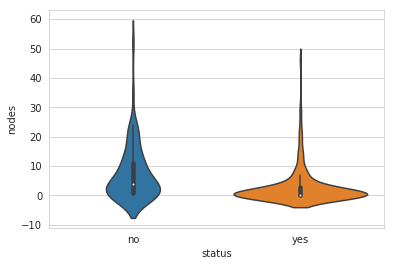

In [18]:
sns.violinplot(x='status',y='age',data = haberman,height = 10)
plt.show()
sns.violinplot(x='status',y='year',data = haberman,height = 10)
plt.show()
sns.violinplot(x='status',y='nodes',data = haberman,height = 10)
plt.show()

#### Observations:
>more the nodes,lesser the survival,also there is small probability of failure
<br>there were more failure cases around the year 1965



## conclusion:

>1 The classification of surivial status is difficult based on given features because the dataset is imbalanced
<br>2 The surivial chance is inversely propotional to the number of nodes and also absence of nodes cannot always guarantee survival

